In [1]:
from datetime import timedelta
import datetime
import time

import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
# %matplotlib qt

import seaborn as sns

import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

## Time Series Analysis

## What is Time-Series Data:
Time series data also referred to as time-stamped data, is a sequence of data points indexed in time order. Time-stamped is data collected at different points in time. These data points typically consist of successive measurements made from the same source over a time interval and are used to track change over time.

### Additive trend and additive seasonality
Additive trend means the trend is linear (straight line), and additive seasonality means there aren’t any changes to widths or heights of seasonal periods over time.
The following code snippet creates a dummy 10-year-long monthly-sampled time series that simulates additive trend and seasonality:

C:\Users\rhamacherhay\Anaconda3\envs\hamacher_env\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


Text(0, 0.5, 'Residual')

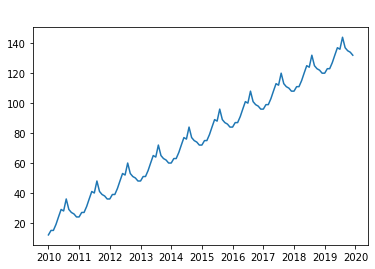

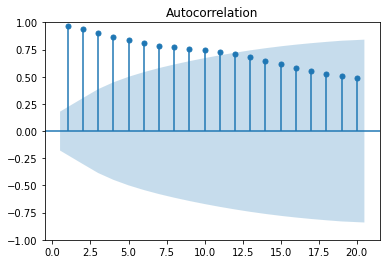

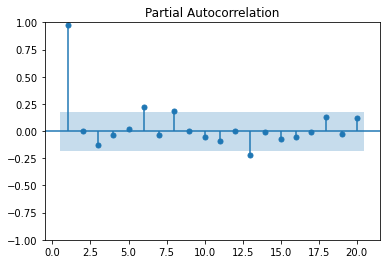

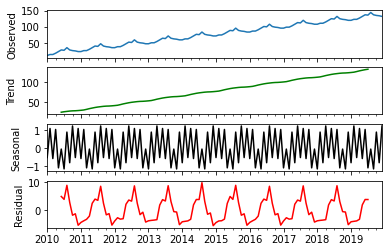

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Terms to be added to single season for seasonality effect
seasonal_adders = [11, 13, 12, 15, 19, 23, 21, 28, 20, 17, 15, 12]
# Immitate 10 years of data
x_range = np.arange(1, 121)

time_series = []
# Split to 10 chunks - 1 year each
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        # Add value to seasonal scalar
        time_series.append(val + seasonal_adders[i])

# Convert to DataFrame
df_aa = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.title(' ', size=20)
plt.plot(df_aa)


# Make ACF plot
plot_acf(df_aa, lags=20, zero=False)
plot_pacf(df_aa, lags=20, zero=False)

result = seasonal_decompose(df_aa, model='additive', period=10)  

fig, axes = plt.subplots(4, 1, sharex=True)
result.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
result.trend.plot(ax=axes[1], legend=False, color='g')
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2], legend=False, color='k')
axes[2].set_ylabel('Seasonal')
result.resid.plot(ax=axes[3], legend=False, color='r')
axes[3].set_ylabel('Residual')

### Sine

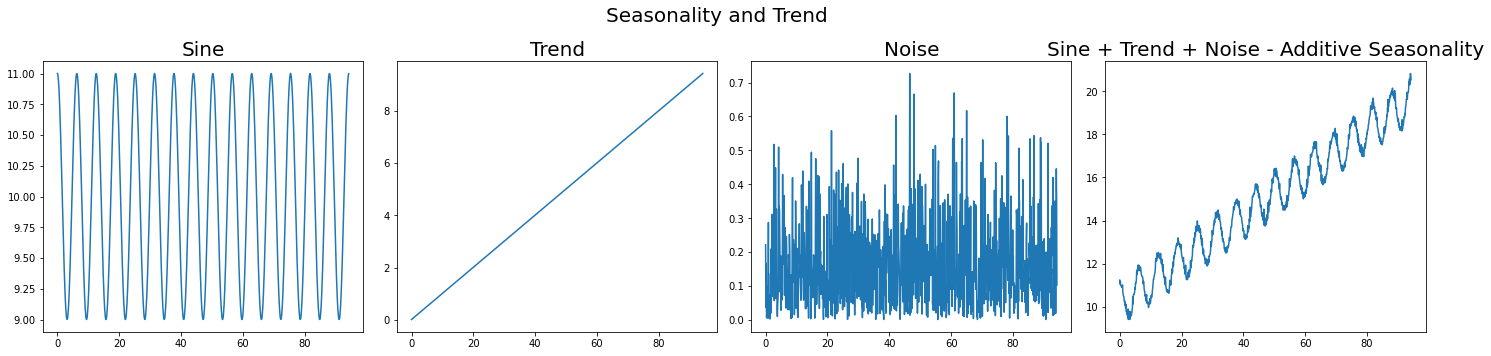

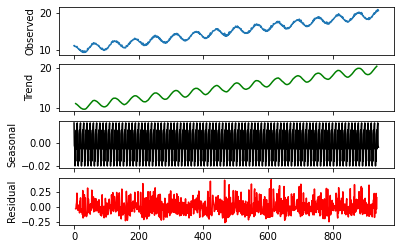

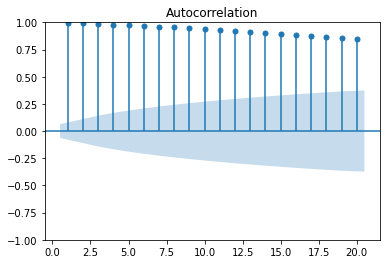

C:\Users\rhamacherhay\Anaconda3\envs\hamacher_env\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


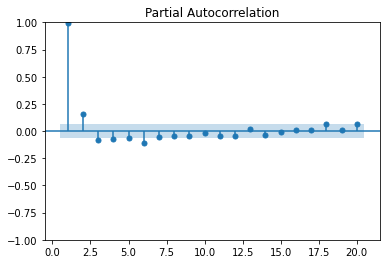

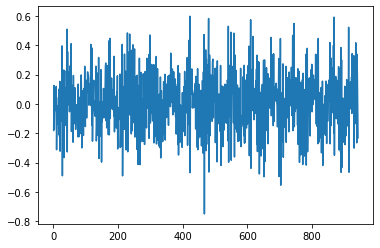

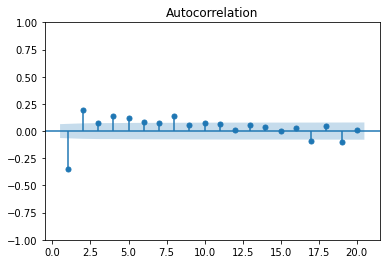

C:\Users\rhamacherhay\Anaconda3\envs\hamacher_env\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


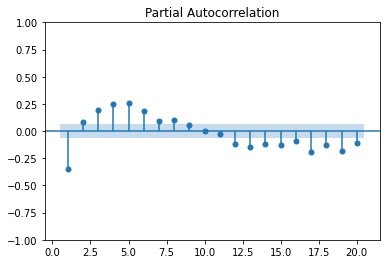

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

x = np.arange(0,30*np.pi,0.1)   # start,stop,step

plt.figure(figsize=(20,5))  
plt.suptitle(f'Seasonality and Trend', fontsize=20)

plt.subplot(1,4,1)
sine = np.cos(x) + 10
txt = f'Sine'
plt.title(txt, fontsize=20)
plt.plot(x,sine)

plt.subplot(1,4,2)
trend = np.arange(1,len(x)+1,1)/100
txt = f'Trend'
plt.title(txt, fontsize=20)
plt.plot(x,trend)

plt.subplot(1,4,3)
noise = np.abs(np.random.normal(0,0.2,len(x)))
txt = f'Noise'
plt.title(txt, fontsize=20)
plt.plot(x,noise)

plt.subplot(1,4,4)
y = sine + trend + noise
txt = f'Sine + Trend + Noise - Additive Seasonality'
plt.title(txt, fontsize=20)
plt.plot(x,y)

plt.subplots_adjust(wspace=0.15, hspace=0.3)
plt.tight_layout()

ydf = pd.DataFrame({'y': y})

result = seasonal_decompose(ydf, model='additive', period=10)  
fig, axes = plt.subplots(4, 1, sharex=True)
result.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
result.trend.plot(ax=axes[1], legend=False, color='g')
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2], legend=False, color='k')
axes[2].set_ylabel('Seasonal')
result.resid.plot(ax=axes[3], legend=False, color='r')
axes[3].set_ylabel('Residual')

# Make ACF plot
plot_acf(ydf, lags=20, zero=False)
plt.show()
plot_pacf(ydf, lags=20, zero=False)
plt.show()

ydf_diff = ydf.diff().dropna()
plt.plot(ydf_diff)
plt.show()
plot_acf(ydf_diff, lags=20, zero=False)
plt.show()
plot_pacf(ydf_diff, lags=20, zero=False)
plt.show()



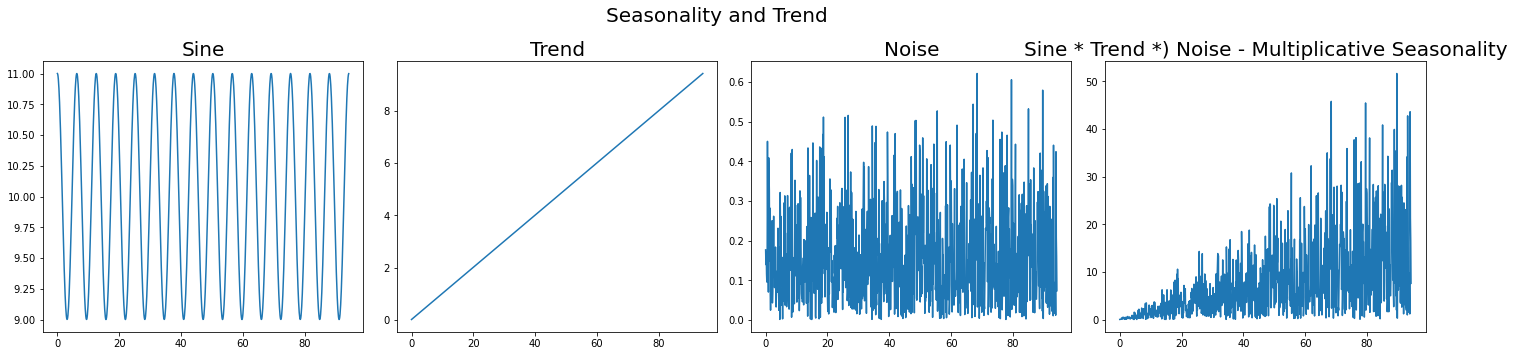

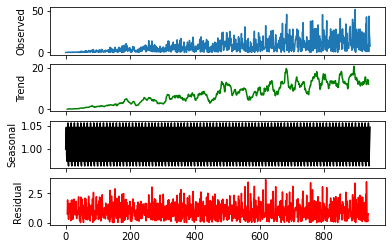

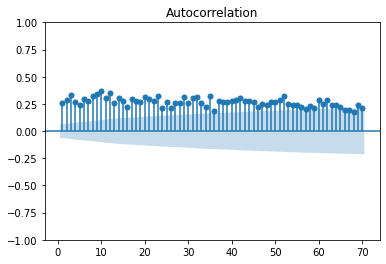

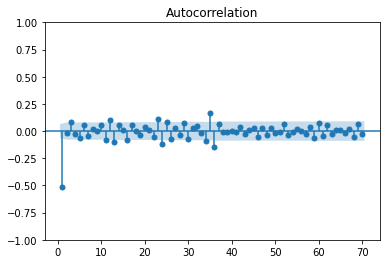

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

x = np.arange(0,30*np.pi,0.1)   # start,stop,step

plt.figure(figsize=(20,5))  
plt.suptitle(f'Seasonality and Trend', fontsize=20)

plt.subplot(1,4,1)
sine = np.cos(x) + 10
txt = f'Sine'
plt.title(txt, fontsize=20)
plt.plot(x,sine)

plt.subplot(1,4,2)
trend = np.arange(1,len(x)+1,1)/100
txt = f'Trend'
plt.title(txt, fontsize=20)
plt.plot(x,trend)

plt.subplot(1,4,3)
noise = np.abs(np.random.normal(0,0.2,len(x)))
txt = f'Noise'
plt.title(txt, fontsize=20)
plt.plot(x,noise)

plt.subplot(1,4,4)
y = sine * trend * noise
txt = f'Sine * Trend *) Noise - Multiplicative Seasonality'
plt.title(txt, fontsize=20)
plt.plot(x,y)

plt.subplots_adjust(wspace=0.15, hspace=0.3)
plt.tight_layout()
plt.show()

ydf = pd.DataFrame({'y': y})

result = seasonal_decompose(ydf, model='multiplicative', period=10)  

fig, axes = plt.subplots(4, 1, sharex=True)
result.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
result.trend.plot(ax=axes[1], legend=False, color='g')
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2], legend=False, color='k')
axes[2].set_ylabel('Seasonal')
result.resid.plot(ax=axes[3], legend=False, color='r')
axes[3].set_ylabel('Residual')

# Make ACF plot
plot_acf(ydf, lags=70, zero=False)
plot_acf(ydf.diff().dropna(), lags=70, zero=False);

# BOOK - Avishek Pal, PKS Prakash - Practical time series analysis_ master time series data processing, visualization, and modeling using Python-Packt Publishing (2017)

## Internal structures of time series
In this section, we will conceptually explain the following special characteristics of time
series data that requires its special mathematical treatment:
- General trend
- Seasonality
- Cyclical movements
- Unexpected variations

xt = ft + st + ct + et, which is a sum of the trend,
seasonal, cyclical, and irregular components in that order.

The objective of time series analysis is to decompose a time series into its constituent
characteristics and develop mathematical models for each. These models are then used to
understand what causes the observed behavior of the time series and to predict the series
for future points in time.

## TREND

rolling mean or linear regression

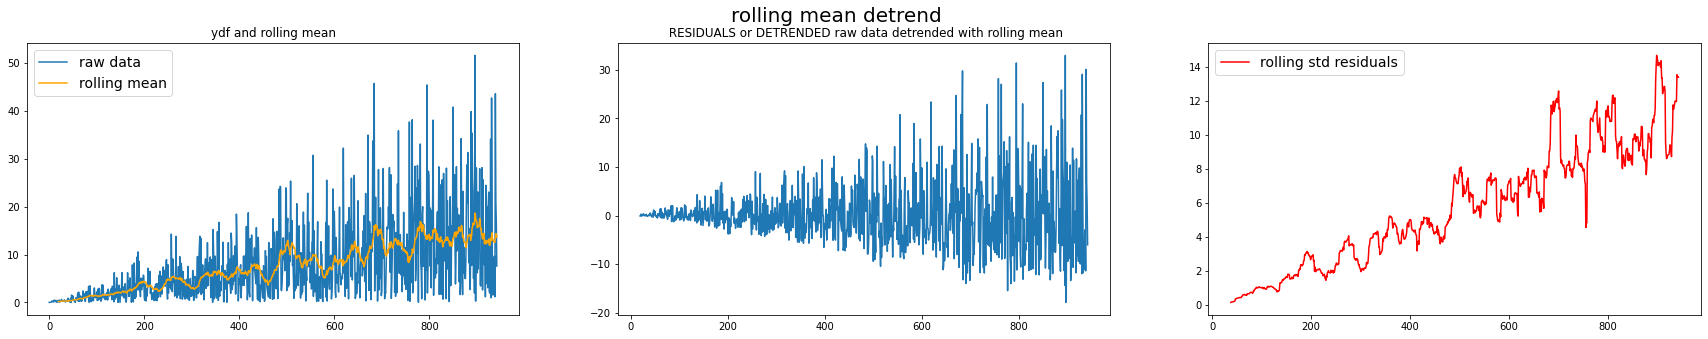

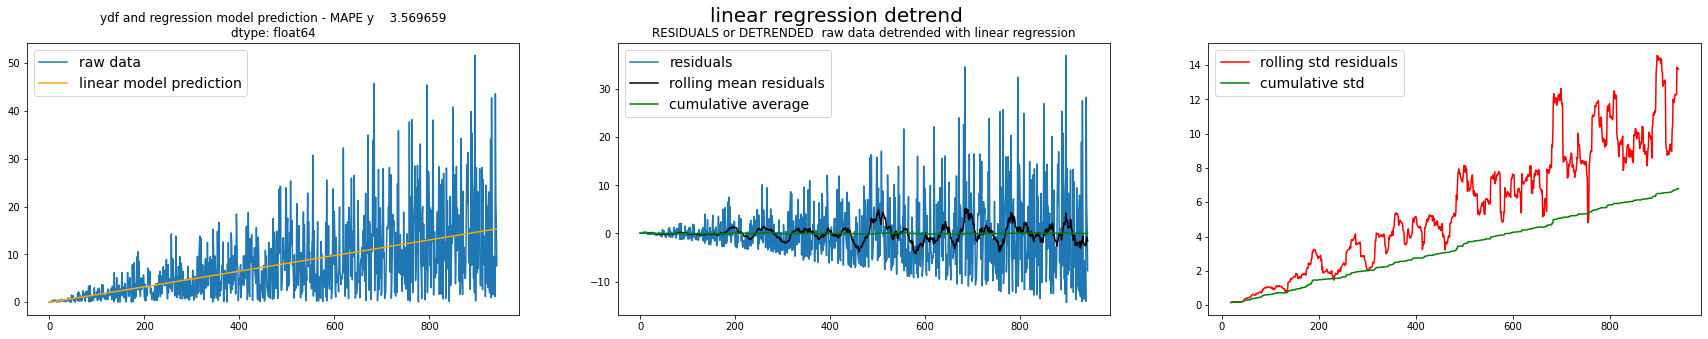

note that the detrended data has constant mean but the variance is changing over time -> raw_data = trend + seasonality + cyclic + noise or raw_data = trend * seasonality * cyclic * noise


In [26]:

plt.figure(figsize=(30,5))  
plt.suptitle(f'rolling mean detrend', fontsize=20)

plt.subplot(1,3,1)
plt.title('ydf and rolling mean')
plt.plot(ydf)
plt.plot(ydf.rolling(20).mean().dropna(), color='orange')
plt.legend(['raw data','rolling mean'], prop={'size': 14})

plt.subplot(1,3,2)
detrended_ydf = ydf - ydf.rolling(20).mean()
plt.title(' RESIDUALS or DETRENDED raw data detrended with rolling mean')
plt.plot(detrended_ydf)

plt.subplot(1,3,3)
plt.title('')
plt.plot(detrended_ydf.rolling(20).std(), color='red')
plt.legend(['rolling std residuals'], prop={'size': 14})

plt.show()

from sklearn.linear_model import LinearRegression
trend_model = LinearRegression()
trend_model.fit(np.array(ydf.index).reshape((-1,1)), ydf)
ydf_pred = trend_model.predict(np.array(ydf.index).reshape((-1,1)))

plt.figure(figsize=(30,5))  
plt.suptitle(f'linear regression detrend', fontsize=20)

plt.subplot(1,3,1)
mape = abs((ydf.values - ydf_pred)/ydf)
plt.title(f'ydf and regression model prediction - MAPE {np.sum(mape)/len(mape)}')
plt.plot(ydf)
plt.plot(ydf_pred, color='orange')
plt.legend(['raw data','linear model prediction'], prop={'size': 14})

plt.subplot(1,3,2)
plt.title('RESIDUALS or DETRENDED  raw data detrended with linear regression')
residuals = ydf - ydf_pred
plt.plot(residuals)
plt.plot(residuals.rolling(20).mean(), color='black')
plt.plot(residuals.expanding().mean(), color='green')
plt.legend(['residuals','rolling mean residuals','cumulative average'], prop={'size': 14})
  
plt.subplot(1,3,3)
plt.title('')
plt.plot(residuals.rolling(20).std(), color='red')
plt.plot(residuals.expanding(min_periods=20).std(), color='green')
plt.legend(['rolling std residuals','cumulative std'], prop={'size': 14})

plt.show()
print('note that the detrended data has constant mean but the variance is changing over time -> raw_data = trend + seasonality + cyclic + noise or raw_data = trend * seasonality * cyclic * noise')

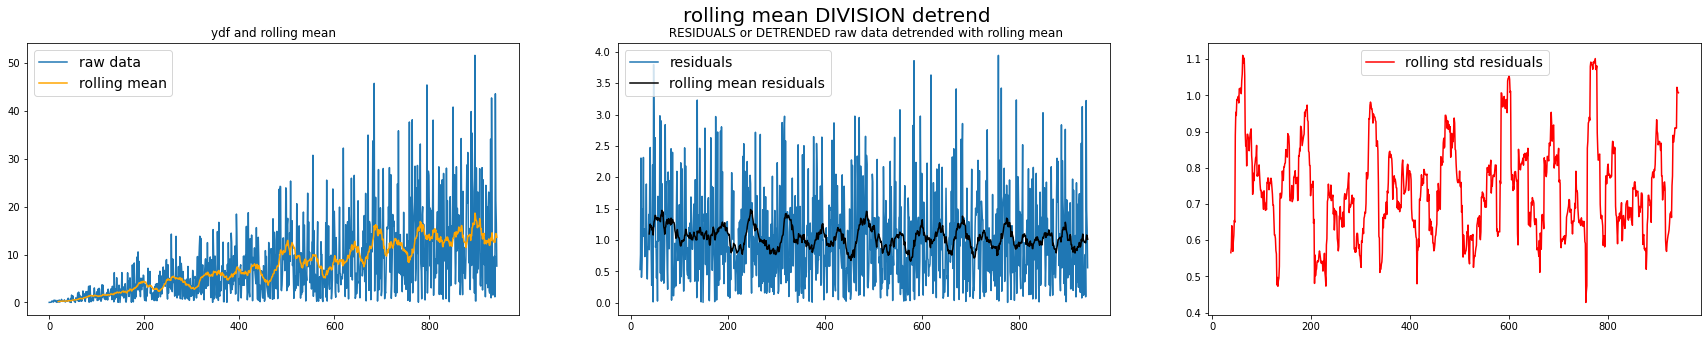

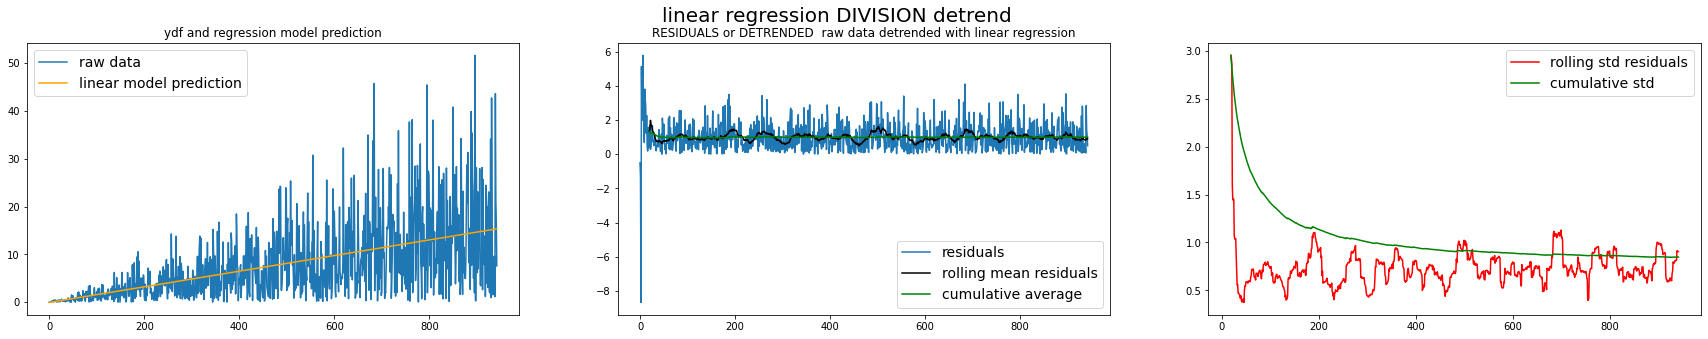

note that the DIVSION detrended cause the rolling mean and std to be more central


In [25]:

plt.figure(figsize=(30,5))  
plt.suptitle(f'rolling mean DIVISION detrend', fontsize=20)

plt.subplot(1,3,1)
plt.title('ydf and rolling mean')
plt.plot(ydf)
plt.plot(ydf.rolling(20).mean().dropna(), color='orange')
plt.legend(['raw data','rolling mean'], prop={'size': 14})

plt.subplot(1,3,2)
detrended_ydf = ydf/ydf.rolling(20).mean()
plt.title(' RESIDUALS or DETRENDED raw data detrended with rolling mean')
plt.plot(detrended_ydf)
plt.plot(detrended_ydf.rolling(20).mean(), color='black')
plt.legend(['residuals','rolling mean residuals'], prop={'size': 14})

plt.subplot(1,3,3)
plt.title('')
plt.plot(detrended_ydf.rolling(20).std(), color='red')
plt.legend(['rolling std residuals'], prop={'size': 14})

plt.show()


from sklearn.linear_model import LinearRegression
trend_model = LinearRegression()
trend_model.fit(np.array(ydf.index).reshape((-1,1)), ydf)
ydf_pred = trend_model.predict(np.array(ydf.index).reshape((-1,1)))

plt.figure(figsize=(30,5))  
plt.suptitle(f'linear regression DIVISION detrend', fontsize=20)

plt.subplot(1,3,1)
plt.title('ydf and regression model prediction')
plt.plot(ydf)
plt.plot(ydf_pred, color='orange')
plt.legend(['raw data','linear model prediction'], prop={'size': 14})

plt.subplot(1,3,2)
plt.title('RESIDUALS or DETRENDED  raw data detrended with linear regression')
residuals = ydf/ydf_pred
plt.plot(residuals)
plt.plot(residuals.rolling(20).mean(), color='black')
plt.plot(residuals.expanding(min_periods=20).mean(), color='green')
plt.legend(['residuals','rolling mean residuals','cumulative average'], prop={'size': 14})
  
plt.subplot(1,3,3)
plt.title('')
plt.plot(residuals.rolling(20, min_periods=20).std(), color='red')
plt.plot(residuals.expanding(min_periods=20).std(), color='green')
plt.legend(['rolling std residuals','cumulative std'], prop={'size': 14})

plt.show()
print('note that the DIVSION detrended cause the rolling mean and std to be more central')

## SEASONALITY
A simple run sequence plot of the original time series with time on x-axis and the variable
on y-axis is good for indicating the following properties of the time series:

- Movements in mean of the series
- Shifts in variance
- Presence of outliers

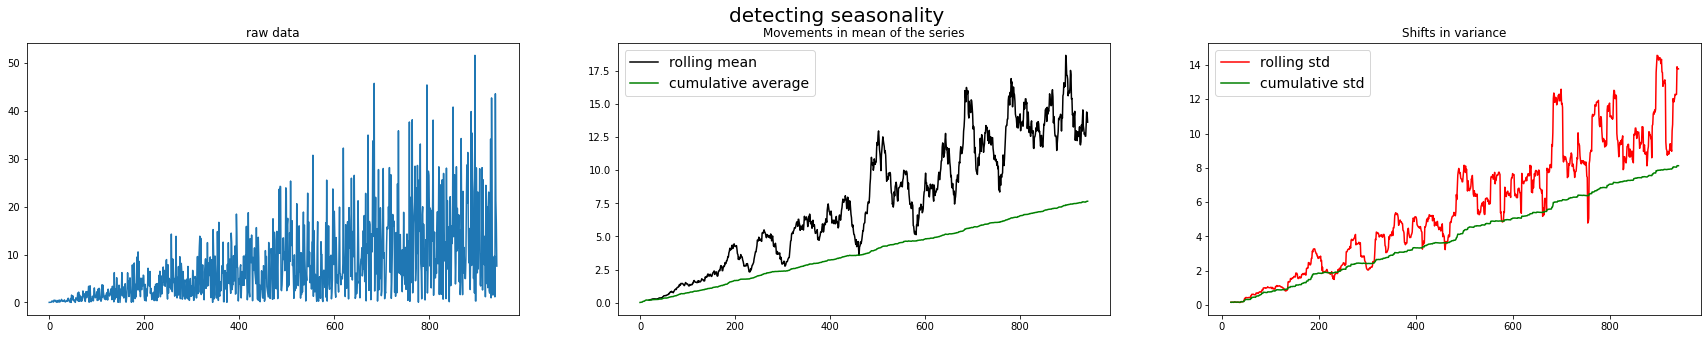

In [27]:
plt.figure(figsize=(30,5))  
plt.suptitle(f'detecting seasonality', fontsize=20)

plt.subplot(1,3,1)
plt.title('raw data')
plt.plot(ydf)
  
plt.subplot(1,3,2)
plt.title('Movements in mean of the series')
plt.plot(ydf.rolling(20).mean(), color='black')
plt.plot(ydf.expanding().mean(), color='green')
plt.legend(['rolling mean','cumulative average'], prop={'size': 14})

plt.subplot(1,3,3)
plt.title('Shifts in variance')
plt.plot(ydf.rolling(20).std(), color='red')
plt.plot(ydf.expanding(min_periods=20).std(), color='green')
plt.legend(['rolling std','cumulative std'], prop={'size': 14})

plt.show()


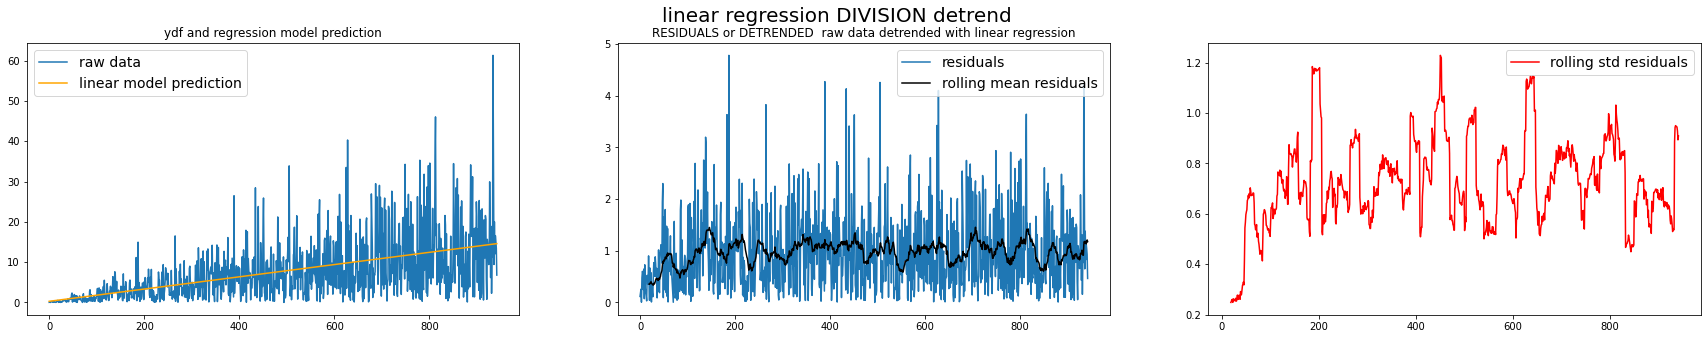

note that the DIVSION detrended cause the rolling mean and std to be more central


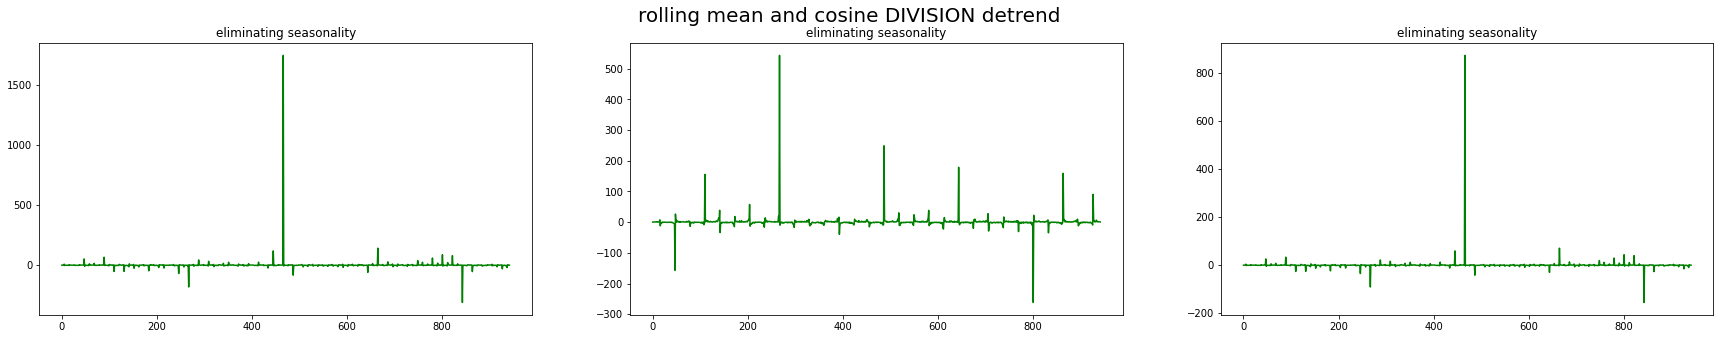

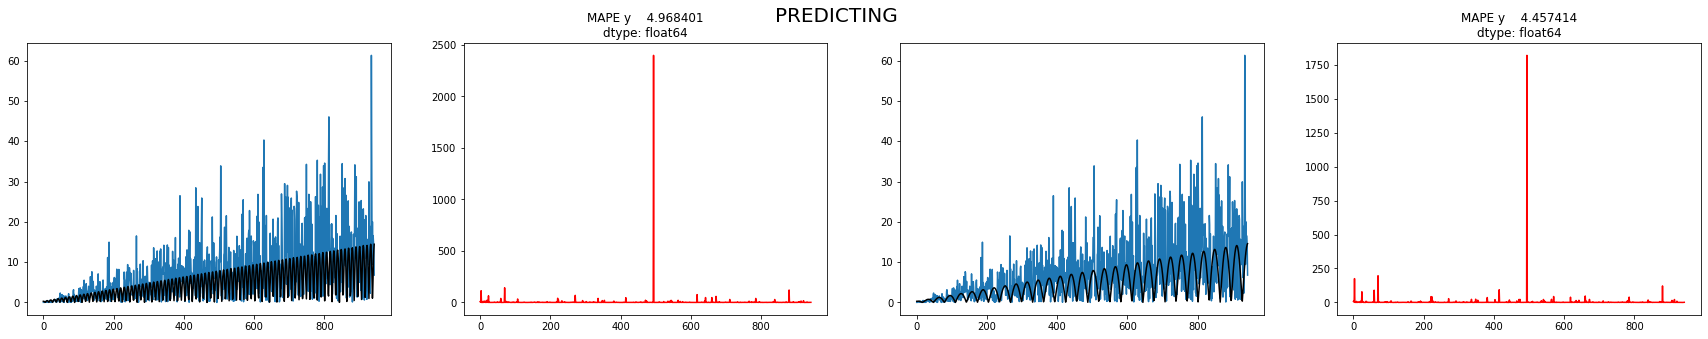

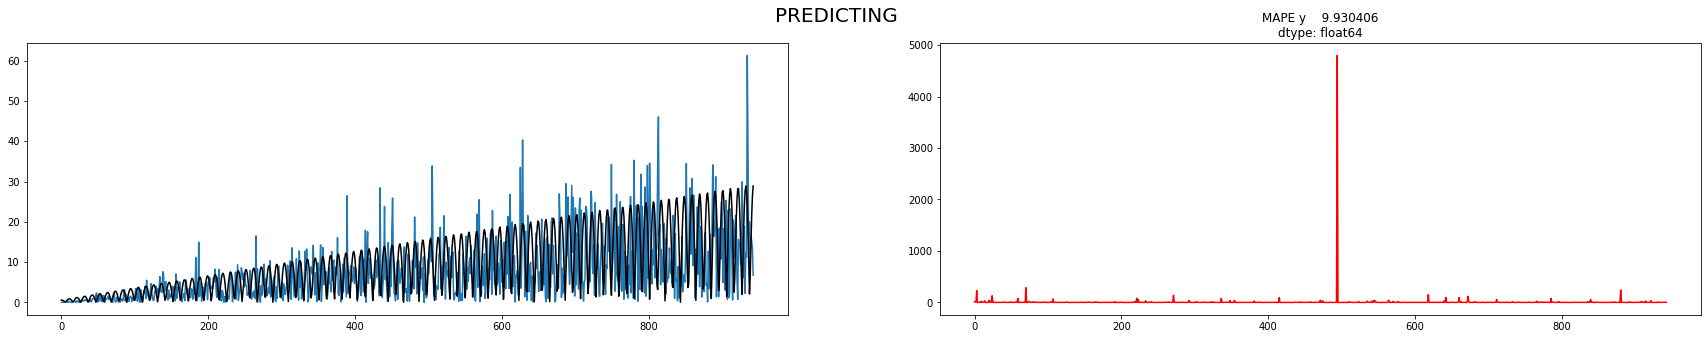

In [ ]:

from sklearn.linear_model import LinearRegression
trend_model = LinearRegression()
trend_model.fit(np.array(ydf.index).reshape((-1,1)), ydf)
ydf_pred = trend_model.predict(np.array(ydf.index).reshape((-1,1)))

plt.figure(figsize=(30,5))  
plt.suptitle(f'linear regression DIVISION detrend', fontsize=20)

plt.subplot(1,3,1)
plt.title('ydf and regression model prediction')
plt.plot(ydf)
plt.plot(ydf_pred, color='orange')
plt.legend(['raw data','linear model prediction'], prop={'size': 14})

plt.subplot(1,3,2)
plt.title('RESIDUALS or DETRENDED  raw data detrended with linear regression')
residuals = ydf/ydf_pred
plt.plot(residuals)
plt.plot(residuals.rolling(20).mean(), color='black')
plt.legend(['residuals','rolling mean residuals'], prop={'size': 14})
  
plt.subplot(1,3,3)
plt.title('')
plt.plot(residuals.rolling(20).std(), color='red')
plt.legend(['rolling std residuals'], prop={'size': 14})

plt.show()
print('note that the DIVSION detrended cause the rolling mean and std to be more central')


plt.figure(figsize=(30,5))  
plt.suptitle(f'rolling mean and cosine DIVISION detrend', fontsize=20)

plt.subplot(1,3,1)
x1 = np.arange(0,100*np.pi,0.3)   # start,stop,step
x1 = np.cos(x1)[:len(residuals)]
plt.title('eliminating seasonality')
plt.plot(residuals['y']/x1, color='green')

plt.subplot(1,3,2)
x2 = np.arange(0,30*np.pi,0.1)   # start,stop,step
x2 = np.cos(x2)[:len(residuals)]
plt.title('eliminating seasonality')
plt.plot(residuals['y']/x2, color='green')

plt.subplot(1,3,3)
amplitude = 2
x3 = np.arange(0,100*np.pi,0.3)   # start,stop,step
x3 = amplitude*np.cos(x3)[:len(residuals)]
plt.title('eliminating seasonality')
plt.plot(residuals['y']/x3, color='green')
plt.show()


plt.figure(figsize=(30,5))  
plt.suptitle(f'PREDICTING', fontsize=20)

pred_x1 = [p*abs(s) for p, s in zip(ydf_pred, x1)]
pred_x2 = [p*abs(s) for p, s in zip(ydf_pred, x2)]
pred_x3 = [p*abs(s) for p, s in zip(ydf_pred, x3)]

plt.subplot(1,4,1)
plt.title('')
plt.plot(ydf)
plt.plot(pred_x1, color='black')

plt.subplot(1,4,2)
mape = abs((ydf.values - pred_x1)/ydf)
plt.title(f'MAPE {np.sum(mape)/len(mape)}')
plt.plot(mape, color='red')

plt.subplot(1,4,3)
plt.title('')
plt.plot(ydf)
plt.plot(pred_x2, color='black')

plt.subplot(1,4,4)
mape = abs((ydf.values - pred_x2)/ydf)
plt.title(f'MAPE {np.sum(mape)/len(mape)}')
plt.plot(mape, color='red')

plt.show()

plt.figure(figsize=(30,5))  
plt.suptitle(f'PREDICTING', fontsize=20)

plt.subplot(1,2,1)
plt.title('')
plt.plot(ydf)
plt.plot(pred_x3, color='black')

plt.subplot(1,2,2)
mape = abs((ydf.values - pred_x3)/ydf)
plt.title(f'MAPE {np.sum(mape)/len(mape)}')
plt.plot(mape, color='red')
plt.show()


## Models for time series analysis
- Zero mean models
- Random walk
- Trend models
- Seasonality models

### Zero mean models -> it shows no trend -> Stationary
The zero-mean models have a constant mean and constant variance and shows no
predictable trends or seasonality. Observations from a zero mean model are assumed to be
independent and identically distributed (iid) and represent the random noise around a
fixed mean, which has been deducted from the time series as a constant term.

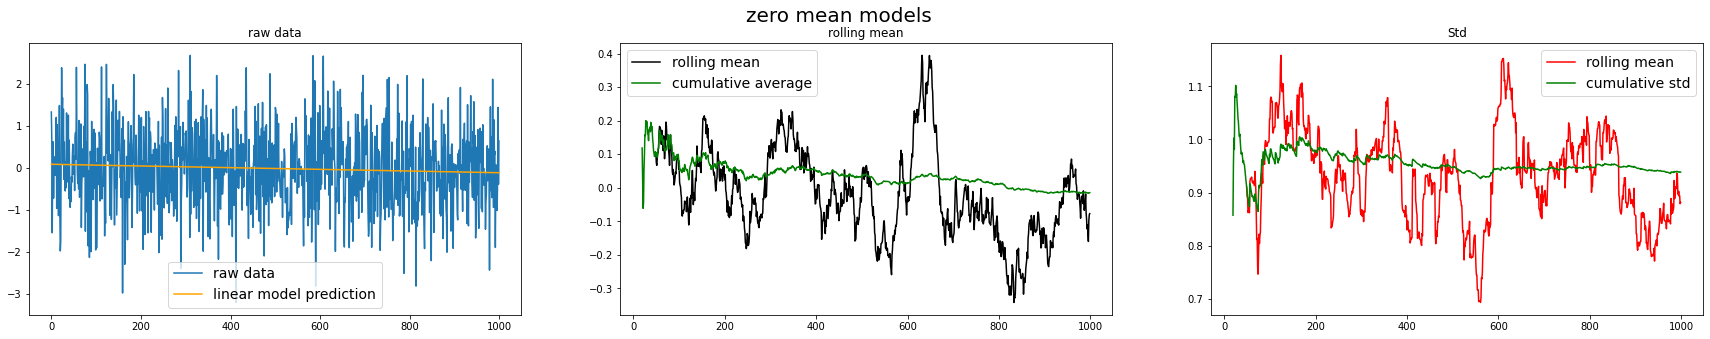

In [20]:
np.random.seed(10)
random_noise = np.random.normal(0,1,1000)
random_noise = pd.DataFrame(random_noise)

plt.figure(figsize=(30,5))  
plt.suptitle('zero mean models', fontsize=20)

from sklearn.linear_model import LinearRegression
trend_model = LinearRegression()
trend_model.fit(np.array(random_noise.index).reshape((-1,1)), random_noise)
random_noise_pred = trend_model.predict(np.array(random_noise.index).reshape((-1,1)))

plt.subplot(1,3,1)
plt.title('raw data')
plt.plot(random_noise)
plt.plot(random_noise_pred, color='orange')
plt.legend(['raw data','linear model prediction'], prop={'size': 14})

plt.subplot(1,3,2)
plt.title('rolling mean')
plt.plot(random_noise.rolling(50).mean(), color='black')
plt.plot(random_noise.expanding(min_periods=20).mean(), color='green')
plt.legend(['rolling mean','cumulative average'], prop={'size': 14})


plt.subplot(1,3,3)
plt.title('Std')
plt.plot(random_noise.rolling(50).std(), color='red')
plt.plot(random_noise.expanding(min_periods=20).std(), color='green')
plt.legend(['rolling mean','cumulative std'], prop={'size': 14})

plt.show()


### Random walk = cumulative of a zero mean model -> Non-Stationary
A random walk is given as a sum of n iids, which has zero mean and constant variance.
Based on this definition, the realization of a random walk at time index t is given by the
sum S = x1 + x2 + ... + xn. The following figure shows the random walk obtained from iids,
which vary according to a normal distribution of zero mean and unit variance.
The random walk is important because if such behavior is found in a time series, it can be
easily reduced to zero mean model by taking differences of the observations from two
consecutive time indices as St - St-1 = xt is an iid with zero mean and constant variance.

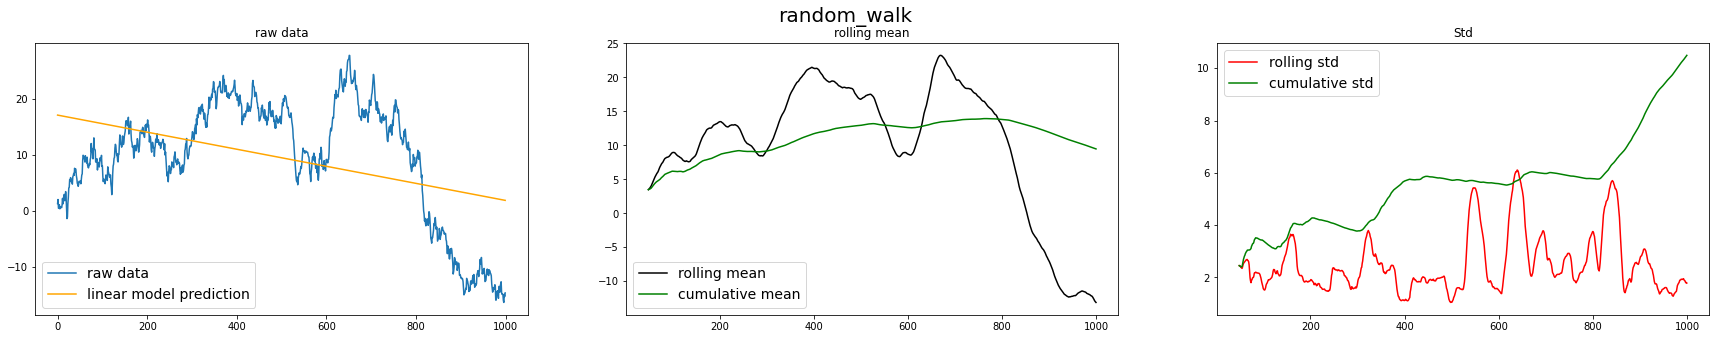

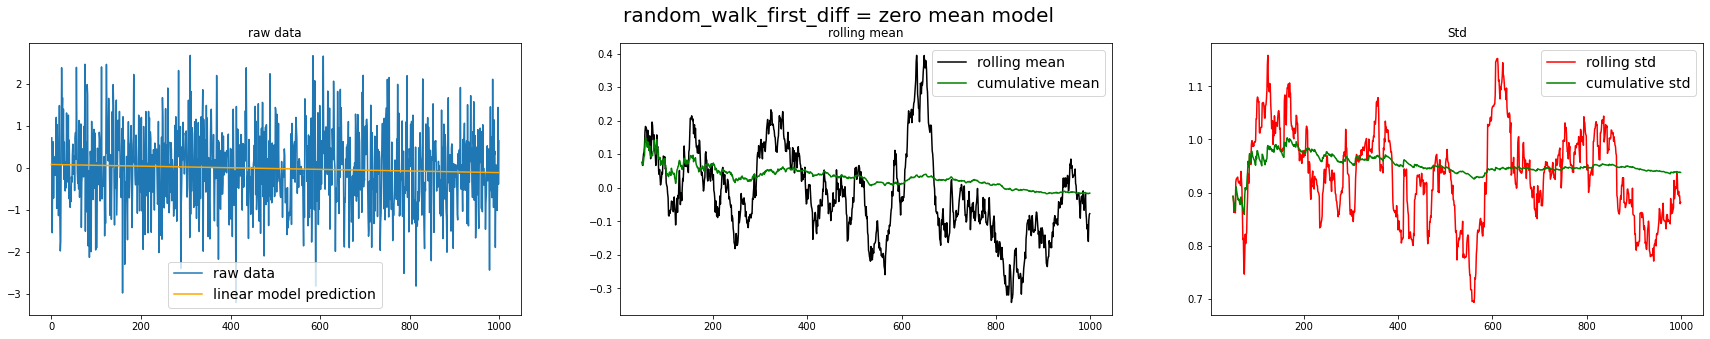

In [30]:
random_walk = np.cumsum(random_noise)
random_walk = pd.DataFrame(random_walk)

plt.figure(figsize=(30,5)) 
plt.suptitle('random_walk', fontsize=20)

from sklearn.linear_model import LinearRegression
trend_model = LinearRegression()
trend_model.fit(np.array(random_walk.index).reshape((-1,1)), random_walk)
random_walk_pred = trend_model.predict(np.array(random_walk.index).reshape((-1,1)))

plt.subplot(1,3,1)
plt.title('raw data')
plt.plot(random_walk)
plt.plot(random_walk_pred, color='orange')
plt.legend(['raw data','linear model prediction'], prop={'size': 14})

plt.subplot(1,3,2)
plt.title('rolling mean')
plt.plot(random_walk.rolling(50).mean(), color='black')
plt.plot(random_walk.expanding(min_periods=50).mean(), color='green')
plt.legend(['rolling mean','cumulative mean'], prop={'size': 14})


plt.subplot(1,3,3)
plt.title('Std')
plt.plot(random_walk.rolling(50).std(), color='red')
plt.plot(random_walk.expanding(min_periods=50).std(), color='green')
plt.legend(['rolling std','cumulative std'], prop={'size': 14})

plt.show()

# -- DIFF ---------------------------------------------

plt.figure(figsize=(30,5)) 
plt.suptitle('random_walk_first_diff = zero mean model', fontsize=20)

random_walk_diff = random_walk.diff().dropna()
from sklearn.linear_model import LinearRegression
trend_model = LinearRegression()
trend_model.fit(np.array(random_walk_diff.index).reshape((-1,1)), random_walk_diff)
random_walk_diff_pred = trend_model.predict(np.array(random_walk_diff.index).reshape((-1,1)))

plt.subplot(1,3,1)
plt.title('raw data')
plt.plot(random_walk_diff)
plt.plot(random_walk_diff_pred, color='orange')
plt.legend(['raw data','linear model prediction'], prop={'size': 14})

plt.subplot(1,3,2)
plt.title('rolling mean')
plt.plot(random_walk_diff.rolling(50).mean(), color='black')
plt.plot(random_walk_diff.expanding(min_periods=50).mean(), color='green')
plt.legend(['rolling mean','cumulative mean'], prop={'size': 14})


plt.subplot(1,3,3)
plt.title('Std')
plt.plot(random_walk_diff.rolling(50).std(), color='red')
plt.plot(random_walk_diff.expanding(min_periods=50).std(), color='green')
plt.legend(['rolling std','cumulative std'], prop={'size': 14})

plt.show()


Random walks are characterized by long sequence of upward or
downward trends. 

xt = xt-l + Єt where Єt is a zero mean random number from
normal distribution

Besides, they take unforeseen changes in direction. Based on these
characteristics, random walks are non-stationary. 

However, the first differences (Δxt of a
random walk are equal to the random noise Єt. Hence the residuals remaining after firstorder
differencing of a random walk is a zero-mean stationary series.

xt - xt-l = Єt ->first-order differences are independent
and identically distributed with a constant mean and a constant variance and hence have no
autocorrelation.

### TREND MODEL
This type of model aims to capture the long run trend in the time series that can be fitted as
linear regression of the time index.

The residuals xt -
µ
(t) of the trend model is considered to the irreducible noise and as
t
realization of the zero mean component yt.


### Seasonality models
Seasonality manifests as periodic and repetitive fluctuations in a time series and hence are
modeled as sum of weighted sum of sine waves of known periodicity.

### Autocorrelation and Partial autocorrelation -> we check the Parcial Autocorr to determine the AR - autoregressive models
After applying the mathematical transformations discussed in the previous section, we will
often be left with what is known as stationary (or weakly stationary) time series, which is
characterized by a constant mean E(xt) and correlation that depends only on the time lag
xt
between two time steps, but independent of the value of the time step

This special definition of autocorrelation ensures
that it is a time-independent property and hence can be reliably used for making inference
about future realization of the time series.

Autocorrelation reflects the degree of linear dependency between the time series at index t
and the time series at indices t-h or t+h. A positive autocorrelation indicates that the present
and future values of the time series move in the same direction, whereas negative values
means that present and future values move in the opposite direction. If autocorrelation is
close to zero, temporal dependencies within the series may be hard to find. Because of this
property, autocorrelation is useful in predicting the future state of a time series at h time
steps ahead.

So far, we have discussed autocorrelation which is a measure of linear dependency between
variables x_t and x_(t+h). Autoregressive (AR) models captures this dependency as a linear
regression between the x_(t+h) and x_t.

variables. Hence, it would erroneous to choose h in AR models based on
autocorrelation. Partial autocorrelation solves this problem by measuring the correlation
between x_t and x_(t+h) when the influence of the intermediate variables has been removed.
Hence partial autocorrelation in time series analysis defines the correlation between x_t and
x_(t+h) which is not accounted for by lags t+1 to t+h-1.
Partial autocorrelation helps in identifying the order h of an AR(h) model.

## Stationary (or weaky stationary) -> constant mean and autocorrelation

<b> Deduction of the trend, seasonal, and cyclical components would leave us with irregular
fluctuations which cannot be modeled by using only the time index as an explanatory
variable. Therefore, in order to further improve forecasting, the irregular fluctuations are
assumed to be independent and identically distributed (iid) observations and modeled by
a linear regression on variables other than the time index (exogenous variables). </b> 

In general, a time series with no predictable patterns in the long run (without
considering exogenous factors as explanatory variables of course!) is stationary.

Non Stationary
- xt = ft + st + ct + et, which is a sum of the trend,
seasonal, cyclical, and irregular components in that order.

Stationary, after proper processing
- <b>xt - ft - st - ct = et -> will remain only the iid observations that MUST TO BE stationary (const mean and var) in order to assure these observations are not changing over time and will not have different proprieties in the future while the model is in production. This component is not related to time index  </b>

Changing the original time series to iid observations, or in other words stationarizing a time
series, is an important step for developing the linear regression model on exogenous
variables.

## The methodology for time series analysis
1. Advanced processing and visualization of time series data
2. Statistical hypothesis testing to verify stationarity of a time series -> if not stationary, try again other processing methods until to be stationary
3. Time series decomposition for adjusting trends and seasonality
4. Train model on exogenous variables

### Processing time series
1. Resampling time series data -> minute to daily
2. Performing group-by
3. Calculating moving statistics -> moving average

- resample() groups rows by some time or date information
- groupby() groups rows based on the values in one or more columns (categories)

## Stationary Processes

An important assumption in statistical estimation theory is that, for sample statistics to be
reliable, the population does not undergo any fundamental or systemic shifts over the
individuals in the sample or over the time during which the data has been collected. This
assumption ensures that sample statistics do not alter and will hold for entities that are
outside the sample used for their estimation.

This assumption also applies to time series analysis so that mean, variance and autocorrelation
estimated from the simple can be used as a reasonable estimate for future
occurrences. <b> In time series analysis, this assumption is known as stationarity, which
requires that the internal structures of the series do not change over time. </b>

<b> Therefore, stationarity requires mean, variance, and autocorrelation to be invariant with respect to the
actual time of observation. Another way of understanding stationarity is that the series has
constant mean and constant variance without any predictable and repetitive patterns. </b>

Durante o treino de um modelo, assumi-se que a amostra é representativa da população, ou seja, os dados de prd seguirá a mesma distribuição dos dados de treino. Isso deve ser verdade para que o modelo performe bem nos dados de prd. Ou seja, a média, desvio padrão e distribuição dos dados devem se manter as mesmas, devem ser invariantes ao tempo. 

Essa mesma lógica deve ser aplicada na análise de séries temporais, logo, a média, variância e autocorrelação devem ser invariantes em relação ao tempo. A média e variância devem permanecer constantes ao longo do tempo. Essa premissa é chamada de <b> estacionariedade dos dados </b> 



### Transforming Non-Stationary to Stationary

#### Differencing

Differencing can remove trend and seasonal components. The methods of decomposition to
develop models of trend and seasonality for complex time series, is discussed in the next
section

The basic idea of differencing is taking differences between successive occurrences of the
time series Δxt = xt - xt-1 such that Δxt have constant mean and variance and hence can be
treated as a stationary series. Δxt being irregular variations free from any long run trend or seasonality.

The ADF test is based on the idea of differencing the original time series and therefore we
will explain it after discussing various types of differencing techniques.

#### Statationarity Test

A quick way to verify whether the first-order differencing has stationarized a time series is
to plot the ACF function and run the Ljung-Box test for the differenced series. 

The Ljung-Box test determines if the observed auto-correlation is statistically significant. 
- H0: The null hypothesis of the Ljung-Box test is that the time series consist of random variations and lacks predictable autocorrelation -> Stationary
- H1: the alternate hypothesis proposes that the observed autocorrelation is not random. -> Non-Stationary

[0.]
Reject Null Hypothesis -> Non-Stationary


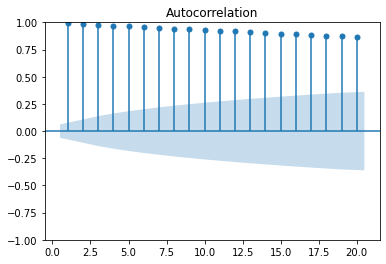

[0.81586343]
Do not reject Null Hypothesis -> Stationary


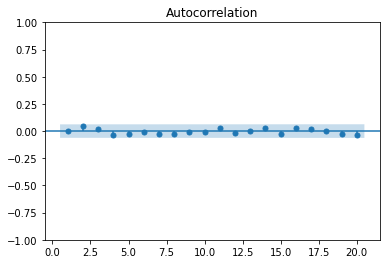

In [43]:
import statsmodels.api as sm

def ljung_box_test(time_series, lags):    
    p_value = sm.stats.acorr_ljungbox(time_series, lags=[lags], return_df=True)['lb_pvalue']
    p_value = p_value.values
    print(p_value)
    if p_value <= 0.05:
        print('Reject Null Hypothesis -> Non-Stationary')
    else:
        print('Do not reject Null Hypothesis -> Stationary')

ljung_box_test(random_walk, lags=10)
plot_acf(random_walk, lags=20, zero=False)
plt.show()

ljung_box_test(random_walk_diff, lags=10)
plot_acf(random_walk_diff, lags=20, zero=False)
plt.show() # Notice that for the differenced series, ACF shows no predictable pattern


#### Seasonal Differencing

When a time series exhibits seasonality of a known time period of m time indices, it can be
stationarized by taking seasonal differences between xt and xt-m. These differences taken at
lags of length m are indicative of the seasons or quarters in a year. In this case m = 12 and
the differences are taken between original observations that are a year apart from each
other. The seasonal differences can be expressed as follows:
x'
t = xt - xt-m = Єt

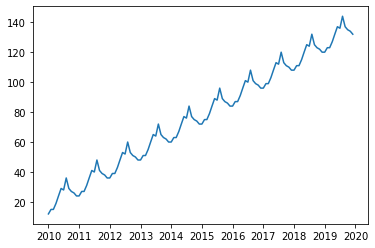

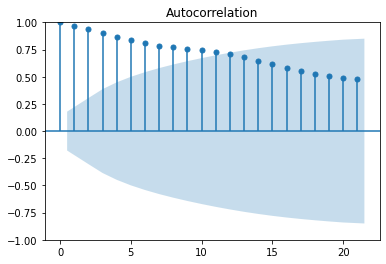

array([1.        , 0.9687878 , 0.93857726, 0.90370504, 0.8684344 ,
       0.83454133, 0.81089902, 0.78631807, 0.7721567 , 0.75846126,
       0.74409055, 0.72548808, 0.7074641 , 0.67740662, 0.6483103 ,
       0.61497772, 0.58138853, 0.54899458, 0.52631792, 0.50271613,
       0.48900044])

In [53]:
plt.plot(df_aa)
plt.show()

plot_acf(df_aa)
plt.show()

# https://www.statsmodels.org/0.9.0/generated/statsmodels.tsa.stattools.acf.html
from statsmodels.tsa.stattools import acf
acf(df_aa)


## Augmented Dickey-Fuller test

ADF test is one of the unit root tests, that is most commonly used for
verifying non-stationarity in the original time series.

According to the ADF test, in the
presence of autocorrelation, the first-order differences x'
t of the original series can be
expressed as a linear regression model of the previous time index and first-order differences
up to a lag of m times indices